# <ins>DETECTION DES LANGUES</ins>

## <ins>IMPORT DEPENDANCES ET DATASET</ins>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from langdetect import detect
import seaborn as sns

In [19]:
X_train = pd.read_csv('X_train_update.csv', index_col = 'Unnamed: 0')
y_train = pd.read_csv('Y_train_CVw08PX.csv', index_col = 'Unnamed: 0')

display(X_train.head())
display(y_train.head())

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


## <ins>NETTOYAGE DES DONNEES</ins>

In [20]:
# jonction de notre DF train et de notre DF y_train
df = pd.merge(left = X_train,
         right = y_train,
         left_index = True,
         right_index = True,
         how = 'inner')

# REMPLACER DES NaN de descirpion en valeur nulle
df['description'] = df.fillna('')

# CONCATENER NOS 2 COLONNES DE TEXTES 
df['produit'] = df['designation'] + " " + df['description']

# SUPPRESION DES 1414 VALEURS EN DOUBLE DANS NOTRE DF X_train
df = df.drop_duplicates(subset=['designation', 'description'])

# SUPPRESSION DES COLONNES DESIGNATION ET DEXCRIPTION
df = df.drop(['description', 'designation'], axis = 1)


In [21]:
display(df.head())
display("Nombre de valeurs nulles : ", df.isna().sum())
print("\n")
display("Shape après nettoyage : ", df.shape)

,productid,imageid,prdtypecode,produit
0,3804725264,1263597046,10,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,436067568,1008141237,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,201115110,938777978,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,50418756,457047496,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,278535884,1077757786,2705,La Guerre Des Tuques Luc a des id&eacute;es de...


'Nombre de valeurs nulles : '

productid      0
imageid        0
prdtypecode    0
produit        0
dtype: int64

'Shape après nettoyage : '

(83502, 4)

## <ins>DETECTION DES LANGUES</ins>

In [9]:
# FONCTION DE DETECTION DE LA LANGUE
def detect_my_langue(text):
    try:
        return detect(text)
    except:
        return 'inconnu'

# APPLICATION DE LA FONCTION SUR NOTRE COLONNE PRODUIT
df['langue'] = df['produit'].apply(detect_my_langue)

## <ins>VISUALISATION DES LANGUES AU SEIN DU DATASET</ins>

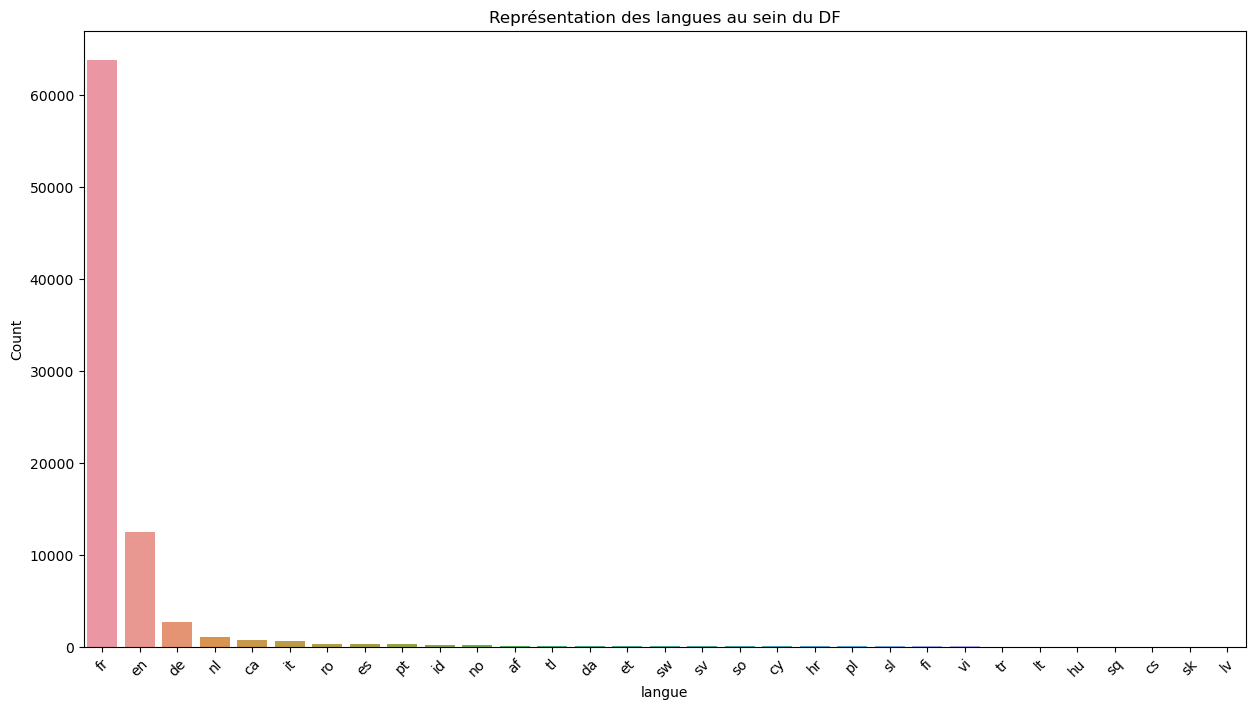

In [13]:
langue_count = df.groupby('langue').agg({'imageid':'count'})

langue_count.columns = (['Count'])

langue_count = langue_count.reset_index()

langue_count = langue_count.sort_values(by= 'Count', ascending = False)

plt.figure(figsize = (15,8))
sns.barplot(data=langue_count, x='langue', y='Count')
plt.title("Représentation des langues au sein du DF")
plt.xticks(rotation = 45)
plt.show();

In [16]:
print("Il y a {} langues détectées au sein du datastet".format(len(langue_count)))

Il y a 31 langues détectées au sein du datastet


In [5]:
top_langue = df.langue.value_counts(ascending = False) / df.shape[0]

In [6]:
top_langue.head(10)

langue
fr    0.763383
en    0.148775
de    0.032347
nl    0.012467
ca    0.009149
it    0.007712
ro    0.004168
es    0.004060
pt    0.003293
id    0.002275
Name: count, dtype: float64

#### Nous constatons que la langue française représente 76 % du dataset et la langue anglais 14%. Nous décidons pour le reste de l'analyse de se militer à ces 2 langues

## <ins>Sélection de nos 2 langues et sauvegarde du nouveau DF</ins>

In [29]:
df_fr_en = df.loc[(df.langue == 'fr') | (df.langue == 'en')]

df_fr_en.value_counts()

langue
fr    63744
en    12423
Name: count, dtype: int64

In [32]:
df_fr_en.head()

,productid,imageid,prdtypecode,produit,langue
1,436067568,1008141237,2280,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,fr
2,201115110,938777978,50,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,fr
3,50418756,457047496,1280,Peluche Donald - Europe - Disneyland 2000 (Mar...,en
4,278535884,1077757786,2705,La Guerre Des Tuques Luc a des id&eacute;es de...,fr
5,5862738,393356830,2280,Afrique Contemporaine N° 212 Hiver 2004 - Doss...,fr


In [33]:
# df_fr_en.to_csv("df_fr_en.csv", index = False)